# <font color=darkgreen> Building a Deep Neural Network on IMDB dataset </font>

The IMDB dataset consists of 50,000 reviews from the Internet Movie Database split into 50% positive and negative reviews respectively. Also, 25,000 reviews are used for training while the remaining 25,000 for testing.

### <font color=deeppink> Import our essential libraries </font>

In [1]:
# We need os, sys, numpy, tensorflow, matplotlib.pyplot
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
%matplotlib inline

### <font color=deeppink> Loading the IMDB dataset </font>

In [2]:
# IMDB dataset comes pre-packaged with keras
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# # num_words=10000 will retain only the top 10,000 most frequently occurring words in the training data.
# # this will discard rare words and help us stay focused on the vector data of manageable size.
# # without this limitation, we would end up working with 88,585 unique words in the sample data

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# Display the dimensions of the data
# Train data - axes, shape, datatype


In [4]:
# Display the dimensions of the data
# Test images - axes, shape, datatype


In [5]:
# Display a sample review from the dataset
# sample_review = 
# print(sample_review)
# # Each word in the review has been mapped to an index

In [6]:
# Let us print out the lengthiest review in the training data
# lengthy_review = 
# print(lengthy_review)

In [7]:
# Now print out the number of words in the sample review and the lengthy review
# print(f"Number of words in the sample review = {}",
#       f"\nNumber of words in the lengthy review = {}")

In [8]:
# Print the max index in the sample and lengthy review
# print(f"The maximum word index in the sample review = {}",
#      f"\nThe maximum word index in the lengthy review = {}")

# the index will never exceed 9999 since we are looking at the top 10,000 most frequently occurring words in the reviews

In [9]:
# Now repeat loading the dataset into train_data2 and test_data2 and check for the max word index in the lengthiest review.
# Here, we do not restrict to the maximum number of frequently occurring words
(train_data2, train_labels2), (test_data2, test_labels2) = imdb.load_data()
print(train_data2.shape)
print()
# Question: How many total words are there across all the reviews?
# Answer: 

(25000,)



In [10]:
# View the worded review (print these statements one at a time, comment out the rest)
word_index = imdb.get_word_index()
# print(word_index)
# The key is the word and the index is the value, hence to get back the word, we need to reverse its order
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reverse_word_index)
# sample_worded_review = ' '.join([reverse_word_index.get(i - 3, '-') for i in sample_review])
# print(sample_worded_review)
# lengthy_worded_review = ' '.join([reverse_word_index.get(i - 3 , '?') for i in lengthy_review])
# print(lengthy_worded_review)
# The indices are offset by 3 places because index 0 is reserved for "padding", 
# 1 for "start of the sequence" and 2 for 'unknown"


1654784/1641221 [==============================] - 0s 0us/step


### <font color=deeppink>Dataset preparation </font>

In this case, we cannot directly feed a list of integers, so we shall one-hot encode (multi-hot encoding) the data
One-hot encoding transforms the list into a vector where only the value of the index where the word occurs would be 1 and rest all 0. 
For example: If we have a review as $[0, 34, 500, 45, 23]$, then one-hot encoding will create a 10,000 dimensional vector (10,000 values) with $1$ only in positions $0, 34, 500, 45, 23$ and the remaining 9,995 positions with values $0$.

In [11]:
# Prepare the dataset for the neural network, we need tensor values - normalized values between 0 to 1
def one_hot_encode_data(review, dimension=10000): 
    encoded_data = np.zeros((len(review), dimension))
    for idx, words in enumerate(review):
        encoded_data[idx, words] = 1. # 1. for a floating point value
    return encoded_data

x_train = one_hot_encode_data(train_data)
x_test = one_hot_encode_data(test_data)

print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# Convert the labels to numpy arrays and float values like the data
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [14]:
y_train[0]

1.0

### <font color=deeppink> Building the model </font>

In [15]:
# Build the model -- do you recollect?
# We need a Sequential model with 3 Dense layers, with 16 neurons in the first two layers
# and the last with ____ neurons (num_classes) 

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(16, activation='relu', name='Dense1', input_shape=(10000,)),
tf.keras.layers.Dense(16, activation='relu', name='Dense2'),
tf.keras.layers.Dense(1, activation='sigmoid', name='Dense_final')
])
# Later, experiment with 2 Dense layers and 4 Dense layers also vary the hidden neurons (dense layer neurons)


2022-03-13 04:00:20.011753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 04:00:20.105118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 04:00:20.105852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 04:00:20.107063: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
model.summary() # we need to mention the input_shape when defining the model in order to print the summary
# What would be the input_shape?

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 16)                160016    
_________________________________________________________________
Dense2 (Dense)               (None, 16)                272       
_________________________________________________________________
Dense_final (Dense)          (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### <font color=deeppink> Compiling the model </font>

In [17]:
# Compile the model
# Here we shall specify the optimizer, the loss function and the metrics the model needs to focus on
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

### <font color=deeppink> Training the model </font>

In [18]:
# Let us prepare our validation dataset (10,000 reviews from the train dataset)
x_val = x_train[:10000] # reserving the first 10,000 reviews for validation
x_train_small = x_train[10000:] # reserving the remaining 15,000 reviews for training
y_val = y_train[:10000]
y_train_small = y_train[10000:]
# Finally train the model on the train_data and train_labels, epochs=20 and batch_size=512
history = model.fit(x_train_small, y_train_small,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

2022-03-13 04:00:24.572725: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5238 - accuracy: 0.7907 - val_loss: 0.3869 - val_accuracy: 0.8734
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3072 - accuracy: 0.9042 - val_loss: 0.3064 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2263 - accuracy: 0.9258 - val_loss: 0.2777 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1758 - accuracy: 0.9441 - val_loss: 0.2740 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1462 - accuracy: 0.9533 - val_loss: 0.2814 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1164 - accuracy: 0.9651 - val_loss: 0.2928 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1006 - accuracy: 0.9700 - val_loss: 0.3167 - val_accuracy: 0.8826
Epoch 8/20
30

### <font color=deeppink> Plotting the training vs. validation accuracy </font>

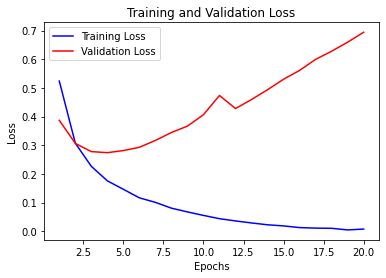

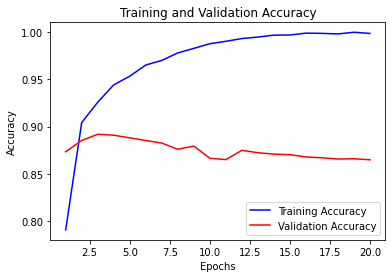

In [19]:
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('D:/SCIT/MBA-DSDA/Semester-II/Deep Learning-2123/Code Files/Output/imdb_dnn_loss.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('D:/SCIT/MBA-DSDA/Semester-II/Deep Learning-2123/Code Files/Output/imdb_dnn_acc.png')
plt.show()

### <font color=deeppink> Let us predict and see </font>

In [20]:
# Let us predict and see
# y_pred = model.predict_classes(np.expand_dims(x_test[4], axis=0))
# print('Y_pred = {} and Y_true = {}'.format(y_pred, y_test[4]))

# Try building the model by replacing the last Dense layer to have __ input neurons 
# when the activation function=softmax
# What should happen to the loss function? Try with binary_crossentropy, does it work?
# Now recall what you used for the MNIST dataset and check if that loss function works?

# Uncomment and execute the following two lines of code 
y_pred = model.predict(np.expand_dims(x_test[4], axis=0))
print('Y_pred = {} and Y_true = {}'.format(np.argmax(y_pred), y_test[4])) # Try without np.argmax first

Y_pred = 0 and Y_true = 1.0


### <font color=deeppink> Re-train the model for 4 epochs and then predict the results </font>

In [21]:
# Before executing the following code, ensure to re-run the model and its compilation code 
# Try ommitting the above step and you'll see the model's accuracy explode
# This time we train on the complete training set for the ideal number of epochs
history2 = model.fit(x_train, y_train,
epochs=14,
batch_size=512)

2022-03-13 04:00:47.710047: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.
2022-03-13 04:00:48.711411: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.


Epoch 1/14
49/49 [==============================] - 1s 13ms/step - loss: 0.2377 - accuracy: 0.9452
Epoch 2/14
49/49 [==============================] - 1s 12ms/step - loss: 0.1363 - accuracy: 0.9600
Epoch 3/14
49/49 [==============================] - 1s 12ms/step - loss: 0.1044 - accuracy: 0.9682
Epoch 4/14
49/49 [==============================] - 1s 12ms/step - loss: 0.0808 - accuracy: 0.9754
Epoch 5/14
49/49 [==============================] - 1s 12ms/step - loss: 0.0636 - accuracy: 0.9810
Epoch 6/14
49/49 [==============================] - 1s 10ms/step - loss: 0.0502 - accuracy: 0.9858
Epoch 7/14
49/49 [==============================] - 0s 9ms/step - loss: 0.0373 - accuracy: 0.9904
Epoch 8/14
49/49 [==============================] - 0s 9ms/step - loss: 0.0292 - accuracy: 0.9927
Epoch 9/14
49/49 [==============================] - 1s 11ms/step - loss: 0.0227 - accuracy: 0.9946
Epoch 10/14
49/49 [==============================] - 1s 10ms/step - loss: 0.0150 - accuracy: 0.9968
Epoch 11/14

In [22]:
# history_dict = history2.history
# loss_value = history_dict['loss']
# val_loss_value = history_dict['val_loss']
# acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
# epochs = range(1, len(loss_value) + 1)
# plt.plot(epochs, loss_value, 'b', label='Training Loss')
# plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# # plt.savefig('D:/SCIT/MBA-DSDA/Semester-II/Deep Learning-2123/Code Files/Output/imdb_dnn_loss.png')
# plt.show()

# plt.figure()

# plt.plot(epochs, acc, 'b', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# # plt.savefig('D:/SCIT/MBA-DSDA/Semester-II/Deep Learning-2123/Code Files/Output/imdb_dnn_acc.png')
# plt.show()

In [23]:
# Evaluate the model

(loss_model, acc_model) = model.evaluate(x_test, y_test)
# Print the test loss and test accuracy obtained
print(f'Test Loss = {loss_model} and Test Accuracy = {acc_model}')
# Predict and see
results = model.predict(x_test)
results

2022-03-13 04:00:58.377457: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.
2022-03-13 04:00:59.519188: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 2s 2ms/step - loss: 1.0365 - accuracy: 0.8514
Test Loss = 1.0365209579467773 and Test Accuracy = 0.851360023021698


2022-03-13 04:01:02.270996: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.


array([[0.0025821 ],
       [1.        ],
       [1.        ],
       ...,
       [0.01237368],
       [0.0040884 ],
       [0.96082497]], dtype=float32)

In [24]:
# Display the confusion matrix
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
# confusion_matrix(test_data, prediction_data)
results2 = model.predict(x_test)
results3 = [1 if result >= 0.5 else 0 for result in results2]
# confusion_matrix(y_test, np.argmax(results2))
print(results2)

[[0.0025821 ]
 [1.        ]
 [1.        ]
 ...
 [0.01237368]
 [0.0040884 ]
 [0.96082497]]


In [25]:
# confusion_matrix?
confusion_matrix(y_test,results3)

array([[10939,  1561],
       [ 2155, 10345]])

In [26]:
# Now write a function to display a descriptive confusion matrix
def display_confusion_matrix(actual, pred):
    (tn, fp), (fn, tp) = confusion_matrix(actual, pred)
    print('-----------Confusion Matrix(actual, pred)------------')
    print(f'True Positives = {tp} \t True Negatives = {tn}',
         f'\nFale Negatives = {fn} \t False Positives = {fp}')
    print('=======================================')
    print(f'Accuracy = {(tp+tn) / (tp+fn+tn+fp)}')
    

    


In [27]:
t = np.arange(0, 1, 0.1)
print(t)
fpr = []
tpr = []
for t1 in t:
    print(f'--Threshold {t1}--')
    pred = np.zeros((y_test.shape))
    for idx, r in enumerate(results):
        if r > t1:
            pred[idx] = 1
    print(pred)
    display_confusion_matrix(y_test, pred)
    (tn, fp), (fn, tp) = confusion_matrix(y_test, pred)
    fpr1 = fp / (fp + tn)
    tpr1 = tp / (tp + fn)
    fpr.append(fpr1)
    tpr.append(tpr1)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
--Threshold 0.0--
[1. 1. 1. ... 1. 1. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 12500 	 True Negatives = 0 
Fale Negatives = 0 	 False Positives = 12500
Accuracy = 0.5
--Threshold 0.1--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 10914 	 True Negatives = 10405 
Fale Negatives = 1586 	 False Positives = 2095
Accuracy = 0.85276
--Threshold 0.2--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 10703 	 True Negatives = 10630 
Fale Negatives = 1797 	 False Positives = 1870
Accuracy = 0.85332
--Threshold 0.30000000000000004--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 10564 	 True Negatives = 10753 
Fale Negatives = 1936 	 False Positives = 1747
Accuracy = 0.85268
--Threshold 0.4--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positiv

In [28]:
t = np.arange(0, 1, 0.1)
print(t)
fpr = []
tpr = []
for t1 in t:
    print(f'--Threshold {t1}--')
    pred = np.zeros((y_test.shape))
    for idx, r in enumerate(results):
        if r > t1:
            pred[idx] = 1
    print(pred)
    display_confusion_matrix(y_test, results3)
    (tn, fp), (fn, tp) = confusion_matrix(y_test, pred)
    fpr1 = fp / (fp + tn)
    tpr1 = tp / (tp + fn)
    fpr.append(fpr1)
    tpr.append(tpr1)
    

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
--Threshold 0.0--
[1. 1. 1. ... 1. 1. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 10345 	 True Negatives = 10939 
Fale Negatives = 2155 	 False Positives = 1561
Accuracy = 0.85136
--Threshold 0.1--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 10345 	 True Negatives = 10939 
Fale Negatives = 2155 	 False Positives = 1561
Accuracy = 0.85136
--Threshold 0.2--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 10345 	 True Negatives = 10939 
Fale Negatives = 2155 	 False Positives = 1561
Accuracy = 0.85136
--Threshold 0.30000000000000004--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
True Positives = 10345 	 True Negatives = 10939 
Fale Negatives = 2155 	 False Positives = 1561
Accuracy = 0.85136
--Threshold 0.4--
[0. 1. 1. ... 0. 0. 1.]
-----------Confusion Matrix(actual, pred)------------
Tr

[1.0, 0.1676, 0.1496, 0.13976, 0.13176, 0.12488, 0.11832, 0.1108, 0.10448, 0.09576]
[1.0, 0.87312, 0.85624, 0.84512, 0.83632, 0.8276, 0.81832, 0.80784, 0.79648, 0.77592]
--ROC CURVE-----


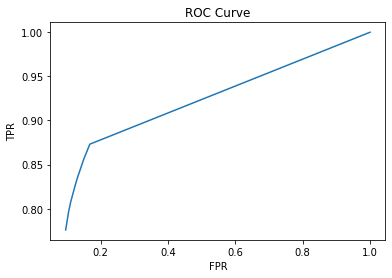

In [29]:
print(fpr)
print(tpr)

print('--ROC CURVE-----')
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [30]:
# Repeat the above exercise for training on 4 epochs with the following changes to the model
# Build a Sequential model with 3 Dense layers, with 31 and 17 neurons each and
# the last with 1 neuron (num_classes)
print('---Model Building----')
model3 = tf.keras.models.Sequential([
tf.keras.layers.Dense(31, activation='relu', name='Dense1', input_shape=(10000,)),
tf.keras.layers.Dense(17, activation='relu', name='Dense2'),
tf.keras.layers.Dense(17, activation='relu', name='Dense3'),
# tf.keras.layers.Dropout(0.5, name='Dropout1'),
tf.keras.layers.Dense(1, activation='sigmoid', name='Dense_final')
])
print('---Model Building Done----')
print('---Model Summary----')
model3.summary()
model3.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
print('---Model Training----')
model3.fit(x_train, y_train, epochs=4, batch_size=512)
print('---Model Evaluation----')
model3.evaluate(x_test, y_test)
pred3 = model3.predict(x_test)
results3 = [1 if result >= 0.5 else 0 for result in pred3]
display_confusion_matrix(y_test, results3)

---Model Building----
---Model Building Done----
---Model Summary----
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 31)                310031    
_________________________________________________________________
Dense2 (Dense)               (None, 17)                544       
_________________________________________________________________
Dense3 (Dense)               (None, 17)                306       
_________________________________________________________________
Dense_final (Dense)          (None, 1)                 18        
Total params: 310,899
Trainable params: 310,899
Non-trainable params: 0
_________________________________________________________________
---Model Training----
Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4559 - accuracy: 0.8035
Epoch 2/4
49/49 [==============================] - 1s 13

In [31]:
# pred3 = model3.predict(x_test)
# display_confusion_matrix(y_test, np.argmax(pred3,axis=-1))
results3 = [1 if result >= 0.5 else 0 for result in pred3]
display_confusion_matrix(y_test, results3)

-----------Confusion Matrix(actual, pred)------------
True Positives = 10978 	 True Negatives = 11040 
Fale Negatives = 1522 	 False Positives = 1460
Accuracy = 0.88072


### <font color=deeppink> Dealing with overfitting </font>
#### Add Dropout layers 

In [32]:
model2 = tf.keras.models.Sequential([
tf.keras.layers.Dense(16, activation='relu', name='Dense1', input_shape=(10000,)),
tf.keras.layers.Dense(16, activation='relu', name='Dense2'),
tf.keras.layers.Dropout(0.5, name='Dropout1'),
tf.keras.layers.Dense(1, activation='sigmoid', name='Dense_final')
])
model2.summary()
model2.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
print('---Model Training----')
model2.fit(x_train, y_train, epochs=20, batch_size=512)
print('---Model Evaluation----')
model2.evaluate(x_test, y_test)
pred2 = model2.predict(x_test)

results3 = [1 if result >= 0.5 else 0 for result in pred2]
display_confusion_matrix(y_test, results3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 16)                160016    
_________________________________________________________________
Dense2 (Dense)               (None, 16)                272       
_________________________________________________________________
Dropout1 (Dropout)           (None, 16)                0         
_________________________________________________________________
Dense_final (Dense)          (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
---Model Training----
Epoch 1/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5281 - accuracy: 0.7575
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3527 - accuracy: 0.8701
Epoch 3/20
49/49 [========